In [2]:
%run 0_base.ipynb

### Two analysis approaches :
1. Take feedback documents and try to see if the new algorithm is able to recongnize manually added metada
2. Use random documents analysis as done in 1st phase 



#### 1. Using feedback documents, try to see if the new algorithm is able to suggest manually added metada

In [3]:
# convert to dataframe
# import df from pickle in "/home/cellar_seta/notebooks/correct_feedbacks/output/corrected_feedback.pkl"
df = pd.read_pickle("/home/cellar_seta/notebooks/correct_feedbacks/output/corrected_feedback.pkl")
print("Total number of feedbacks: ", len(df))
df.head()


Total number of feedbacks:  173


document_id                                      document_text  \
10  KJNA31327ENN  socrates social multi-criteria assessment of e...   
14  KJNA31329ENN  this report presents an assessment of european...   
15  KJNA31334ENN  the high performance liquid chromatography hpl...   
16  KJNA31346ENN  this joint research centre jrc technical repor...   
18  KJNA31331ENN  this report documents the criteria proposed to...   

                               cellar_id  \
10  90d83990-7b6b-11ed-9887-01aa75ed71a1   
14  8ec8609d-7c39-11ed-9887-01aa75ed71a1   
15  a94f0657-7c36-11ed-9887-01aa75ed71a1   
16  8ba3bd75-7c38-11ed-9887-01aa75ed71a1   
18  24ec839c-7f4e-11ed-9887-01aa75ed71a1   

                            selected_eurovoc_concepts  \
10          [1835, 1894, 1895, 2451, 688, 7131, 8466]   
14    [134, 2530, 2680, 2825, 3144, 3535, 4628, 5585]   
15   [2395, 2896, 2919, 2924, 3660, 4426, 5188, 5742]   
16  [1759, 1854, 2479, 2896, 3885, 4635, 4636, 589...   
18               [1534, 2530, 2538, 2896, 3144, 3535]   

    manualy_added_eurovoc_concepts  
10                          [5311]  
14                     [5742, 602]  
15                              []  
16                              []  
18  [1278, c_838aa925, c_98d1408a]

In [4]:
token_json, api_url = seta_api_utils.init_seta_api(force=True)
# using get_similar_docs_by_content() get similar documents for each document
date_range = ["gte:2300-01-01", "lte:2300-01-01"]

## Stats
### 1 Level Eurovoc concepts Match

In [5]:
# feedback_eurovoc_concepts = select_eurovoc_concepts + manually added eurovoc concepts
# df['feedback_eurovoc_concepts'] = df['selected_eurovoc_concepts'] + df['manualy_added_eurovoc_concepts']
df['feedback_eurovoc_concepts'] =  df['manualy_added_eurovoc_concepts']

In [6]:
df.head()

document_id                                      document_text  \
10  KJNA31327ENN  socrates social multi-criteria assessment of e...   
14  KJNA31329ENN  this report presents an assessment of european...   
15  KJNA31334ENN  the high performance liquid chromatography hpl...   
16  KJNA31346ENN  this joint research centre jrc technical repor...   
18  KJNA31331ENN  this report documents the criteria proposed to...   

                               cellar_id  \
10  90d83990-7b6b-11ed-9887-01aa75ed71a1   
14  8ec8609d-7c39-11ed-9887-01aa75ed71a1   
15  a94f0657-7c36-11ed-9887-01aa75ed71a1   
16  8ba3bd75-7c38-11ed-9887-01aa75ed71a1   
18  24ec839c-7f4e-11ed-9887-01aa75ed71a1   

                            selected_eurovoc_concepts  \
10          [1835, 1894, 1895, 2451, 688, 7131, 8466]   
14    [134, 2530, 2680, 2825, 3144, 3535, 4628, 5585]   
15   [2395, 2896, 2919, 2924, 3660, 4426, 5188, 5742]   
16  [1759, 1854, 2479, 2896, 3885, 4635, 4636, 589...   
18               [1534, 2530, 2538, 2896, 3144, 3535]   

    manualy_added_eurovoc_concepts       feedback_eurovoc_concepts  
10                          [5311]                          [5311]  
14                     [5742, 602]                     [5742, 602]  
15                              []                              []  
16                              []                              []  
18  [1278, c_838aa925, c_98d1408a]  [1278, c_838aa925, c_98d1408a]

In [7]:
#  for each concept in feedback_eurovoc_concepts, 
#      if concept is in matched_eurovoc_concepts, then add 1 to the count
#  percentage of concepts matched = count/len(feedback_eurovoc_concepts)

def get_matched_eurovoc_concepts_percentage(row):
    matched_eurovoc_concepts = set(row['feedback_eurovoc_concepts']).intersection(set(row['matched_eurovoc_concepts']))
    if len(row['feedback_eurovoc_concepts']) > 0:
        return len(matched_eurovoc_concepts)/len(row['feedback_eurovoc_concepts'])
    else:
        return 0

In [11]:
# number of rows where manualy_added_eurovoc_concepts is empty
df[df['manualy_added_eurovoc_concepts'].map(len) == 0].shape

(51, 8)

In [14]:
df.shape

(122, 8)

In [13]:
# delete rows where manualy_added_eurovoc_concepts is empty
df = df[df['manualy_added_eurovoc_concepts'].map(len) > 0]

In [9]:

from collections import defaultdict
n_concepts = [10, 20, 30, 40, 50]
results = defaultdict(float)
for n in n_concepts:
    df['matched_eurovoc_concepts'] = df.apply(lambda row: get_eurovoc_concepts_using_seta_text_similarity(row['document_text'], n, date_range), axis=1)
    df['matched_eurovoc_concepts_percentage'] = df.apply(lambda row: get_matched_eurovoc_concepts_percentage(row), axis=1)
    r = df['matched_eurovoc_concepts_percentage'].sum()/len(df)
    results[n] = r * 100
    print("Total percentage of concepts matched for n_concepts = {}: {}".format(n, r))


Total percentage of concepts matched for n_concepts = 10: 0.046407927332782824
Total percentage of concepts matched for n_concepts = 20: 0.06589866459808655
Total percentage of concepts matched for n_concepts = 30: 0.0938920584874342
Total percentage of concepts matched for n_concepts = 40: 0.12236714794518262
Total percentage of concepts matched for n_concepts = 50: 0.1402862230896913


# previous run
Total percentage of concepts matched for n_concepts = 10: 0.16674861536930502
Total percentage of concepts matched for n_concepts = 20: 0.23081499917706813
Total percentage of concepts matched for n_concepts = 30: 0.2928009442664615
Total percentage of concepts matched for n_concepts = 40: 0.3376131052855191
Total percentage of concepts matched for n_concepts = 50: 0.3698516234723131

In [18]:
results_tmp = defaultdict(float)
results_tmp[10] = 0.16674861536930502 * 100
results_tmp[20] = 0.23081499917706813* 100
results_tmp[30] = 0.2928009442664615* 100
results_tmp[40] = 0.3376131052855191* 100
results_tmp[50] = 0.3698516234723131* 100

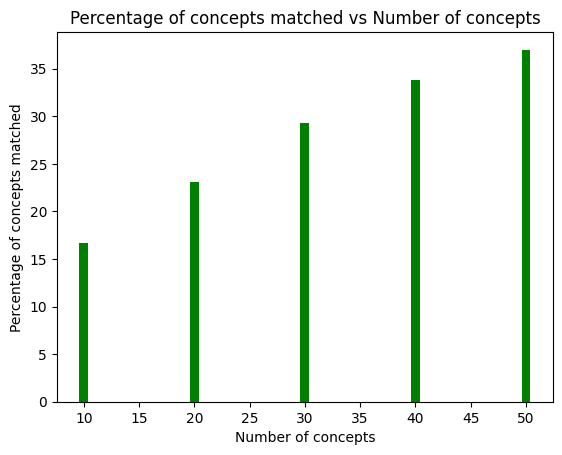

In [19]:
# disolay the results in a bar chart
import matplotlib.pyplot as plt
plt.bar(results_tmp.keys(), results_tmp.values(), color='g') 
plt.xlabel("Number of concepts")
plt.ylabel("Percentage of concepts matched")
plt.title("Percentage of concepts matched vs Number of concepts")
plt.show()

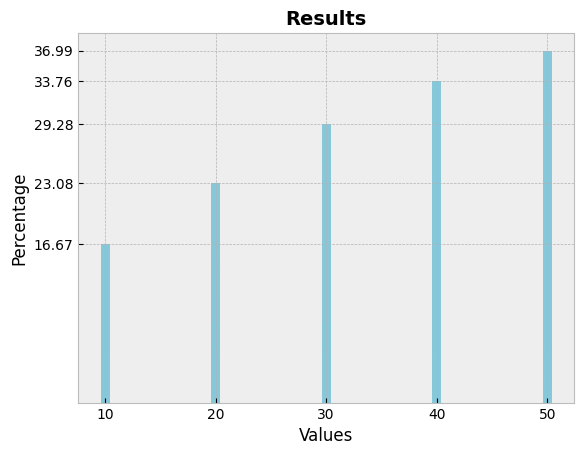

In [20]:
# Set the style
plt.style.use('bmh')

# Create a vertical bar chart
plt.bar(list(results_tmp.keys()), list(results_tmp.values()), color='#86C7D9')

# Add a title and axis labels
plt.title('Results', fontsize=14, fontweight='bold')
plt.xlabel('Values', fontsize=12)
plt.xticks(list(results_tmp.keys()))
plt.ylabel('Percentage', fontsize=12)
plt.yticks(list(results_tmp.values()))

# Add labels to the bars
# for i, v in enumerate(results_tmp.values()):
#     plt.text(i + 9.5, v + 1, str(round(v, 2)) + '%', color='#1C1C1C', fontweight='bold')

# Show the plot
plt.show()

### Multi-levels Eurovoc concepts Match